In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.offsetbox import AnchoredText
from scipy.signal import argrelextrema
from scipy import stats


d_inter = 0.282E-9
h = 4.14E-15
c = 3e8
e = 1.602E-19

In [17]:
data = pd.read_csv("eq2_M1_M2_35kV_30graus.txt",skiprows = 1,header = None, delimiter = '\t', names=['theta','m1','m2'])
data['theta'] = data['theta'].str.replace(',','.')

data['theta'] = pd.to_numeric(data['theta'], errors='coerce')
data['m1'] = pd.to_numeric(data['m1'], errors='coerce')
data['m2'] = pd.to_numeric(data['m2'], errors='coerce')
data['d_theta'] = data['theta'].diff()
data['d_m1'] = data['m1'].diff()
data['d_m2'] = data['m2'].diff()
data['theta_wavelength'] = 2*d_inter*np.sin(np.deg2rad(data['theta']))
data['theta_eV'] = np.divide(4.13566743*10**(-15)*2.998*10**8,data['theta_wavelength'])
data['sigma_theta_eV'] = np.deg2rad(0.05)*((h*c)/(2*d_inter))*(np.cos(np.deg2rad(data['theta']))/(np.sin(np.deg2rad(data['theta']))**2))

In [18]:
data

,theta,m1,m2,d_theta,d_m1,d_m2,theta_wavelength,theta_eV,sigma_theta_eV
0,2.5,2,3,NaN,NaN,NaN,2.460133e-11,50398.611377,1009.060467
1,2.6,0,1,0.1,-2.0,-2.0,2.558473e-11,48461.458184,932.908927
2,2.7,2,2,0.1,2.0,1.0,2.656804e-11,46667.845257,865.060952
3,2.8,3,4,0.1,1.0,2.0,2.755127e-11,45002.393287,804.351772
4,2.9,2,1,0.1,-1.0,-3.0,2.853442e-11,43451.844249,749.813914
...,...,...,...,...,...,...,...,...,...
271,29.6,8,7,0.1,0.0,4.0,2.785832e-10,4450.638225,6.848654
272,29.7,12,4,0.1,4.0,-3.0,2.794387e-10,4437.012999,6.800026
273,29.8,4,6,0.1,-8.0,2.0,2.802933e-10,4423.484377,6.751884
274,29.9,8,8,0.1,4.0,2.0,2.811471e-10,4410.051395,6.704220


In [20]:
peak_m1,_ = find_peaks(data['m1'], height = 0,distance = 8,prominence = 50)

peak_info = data['theta'][peak_m1]

peak_info = peak_info.reset_index(drop = True)
lambda_info = []

In [177]:
# lambda_info.append(np.divide(2*d_inter*np.sin(np.deg2rad(peak_info[4])),3))

In [4]:
lambda_info = pd.Series(lambda_info)

<ipython-input-4-6b95c4fdb6c5>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lambda_info = pd.Series(lambda_info)


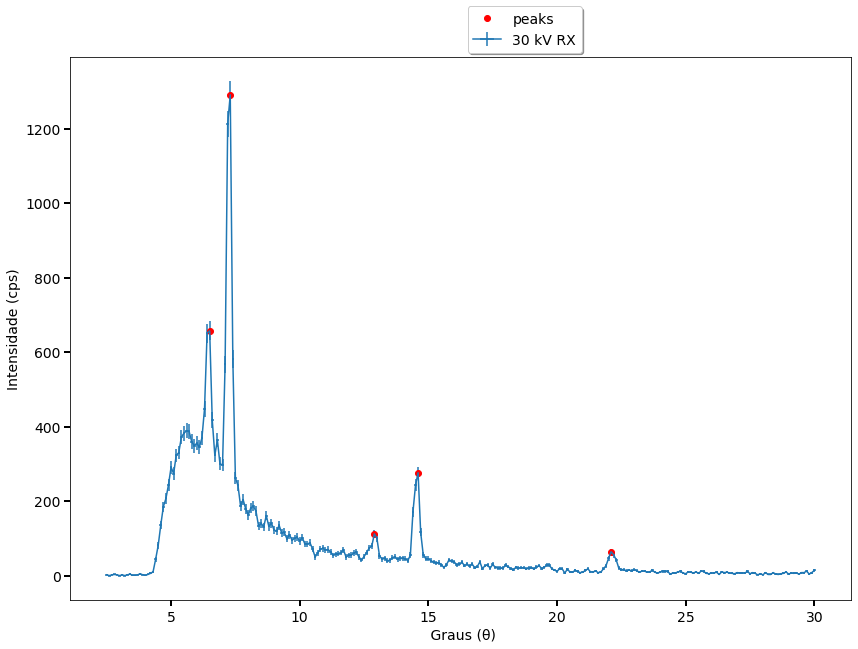

In [41]:
# text_to_plot = 'λ($K_1β$) = {:.2E}m\nλ($K_1α$) = {:.2E}m\nλ($K_2β$) = {:.2E}m\nλ($K_2α$) = {:.2E}m\nλ($K_3α$) = {:.2E}m'.format(lambda_info[0],lambda_info[1],lambda_info[2],lambda_info[3],lambda_info[4])
# text_to_plot2 = 'θ($K_1β$) = {}\nθ($K_1α$) = {}\nθ($K_2β$) = {}\nθ($K_2α$) = {}\nθ($K_3α$) = {}'.format(peak_info[0],peak_info[1],peak_info[2],peak_info[3],peak_info[4])

fig, ax1 = plt.subplots(figsize = (14,10))

ax1.errorbar(data['theta'],data['m1'], xerr = 0.05, yerr = np.sqrt(data['m1']), label = '30 kV RX')
ax1.plot(data['theta'][peak_m1],data['m1'][peak_m1],'o',color = 'red', label = 'peaks')

ax1.legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize = 14)

ax1.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 14)
# parameters_text = AnchoredText(text_to_plot,loc = 'upper right')
# parameters_text2 = AnchoredText(text_to_plot2,loc = 'lower right', frameon=True)

# ax1.add_artist(parameters_text)
# ax1.add_artist(parameters_text2)

plt.ylabel('Intensidade (cps)', fontsize = 14)
plt.xlabel(' Graus (θ)', fontsize = 14)

plt.savefig('rx_degrees.png',dpi =300)


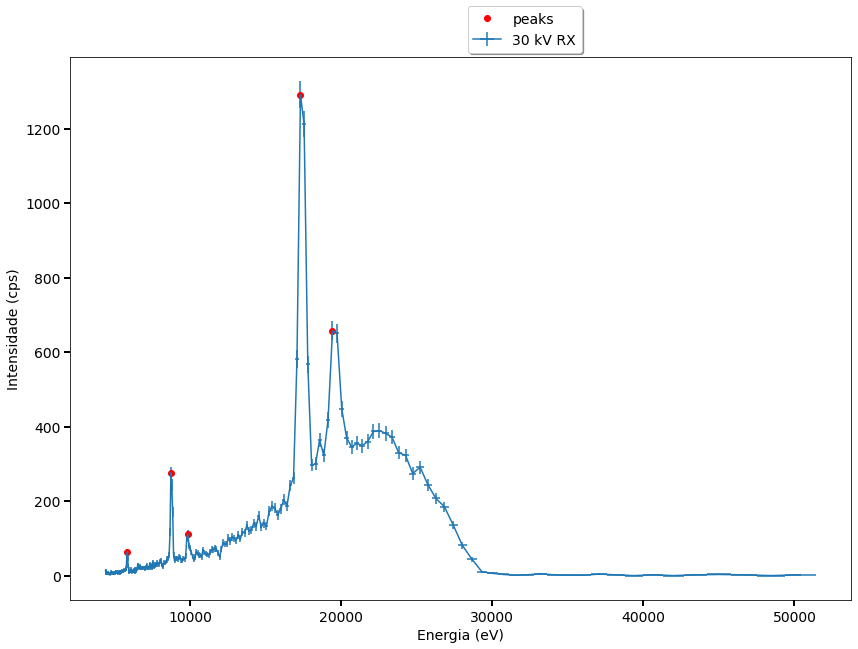

In [49]:
fig, ax1 = plt.subplots(figsize = (14,10))
ax1.errorbar(data['theta_eV'],data['m1'], xerr = data['sigma_theta_eV'], yerr =np.sqrt(data['m1']) , label = '30 kV RX')
ax1.plot(data['theta_eV'][peak_m1],data['m1'][peak_m1],'o',color = 'red', label = 'peaks')

ax1.legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
# parameters_text = AnchoredText(text_to_plot,loc = 'upper right')
# ax1.add_artist(parameters_text)
ax1.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 14)

plt.ylabel('Intensidade (cps)', fontsize = 14)
plt.xlabel('Energia (eV)', fontsize = 14)

plt.savefig('rx_eV.png',dpi =300)

In [22]:
mascara = data['theta'] == peak_info[4]

In [26]:
data['theta_eV'][mascara]

196    5843.207809
Name: theta_eV, dtype: float64

In [28]:
np.deg2rad(peak_info)

0    0.113446
1    0.127409
2    0.225147
3    0.254818
4    0.385718
Name: theta, dtype: float64

In [29]:
peak_info

0     6.5
1     7.3
2    12.9
3    14.6
4    22.1
Name: theta, dtype: float64

In [52]:
data_2 = pd.read_csv("eq2_M1_variaçãotensão.txt",skiprows = 1,header = None, delimiter = '\t', names=['theta','35kV','30kV','28kV','25kV','18kV'])

data_2['theta'] = data_2['theta'].str.replace(',','.')

data_2['theta'] = pd.to_numeric(data_2['theta'], errors='coerce')

data_2['35kV'] = pd.to_numeric(data_2['35kV'], errors='coerce')

data_2['30kV'] = pd.to_numeric(data_2['30kV'], errors='coerce')
data_2['28kV'] = pd.to_numeric(data_2['28kV'], errors='coerce')
data_2['25kV'] = pd.to_numeric(data_2['25kV'], errors='coerce')
data_2['18kV'] = pd.to_numeric(data_2['18kV'], errors='coerce')

data_2['theta_wavelength'] = 2*d_inter*np.sin(np.deg2rad(data_2['theta']))
data_2['theta_eV'] = np.divide(4.13566743*10**(-15)*2.998*10**8,data_2['theta_wavelength'])
data_2['sigma_theta_eV'] = np.deg2rad(0.05)*((h*c)/(2*d_inter))*(np.cos(np.deg2rad(data_2['theta']))/(np.sin(np.deg2rad(data_2['theta']))**2))

In [53]:
peak_35kv,_ = find_peaks(data_2['35kV'], height = 0,distance = 8,prominence = 90)
peak_30kv,_ = find_peaks(data_2['30kV'], height = 0,distance = 8,prominence = 90)
peak_28kv,_ = find_peaks(data_2['28kV'], height = 0,distance = 8,prominence = 90)
# peak_25kv,_ = find_peaks(data_2['25kV'], height = 0,distance = 8,prominence = 90)
# peak_18kv,_ = find_peaks(data_2['18kV'], height = 0,distance = 8,prominence = 90)

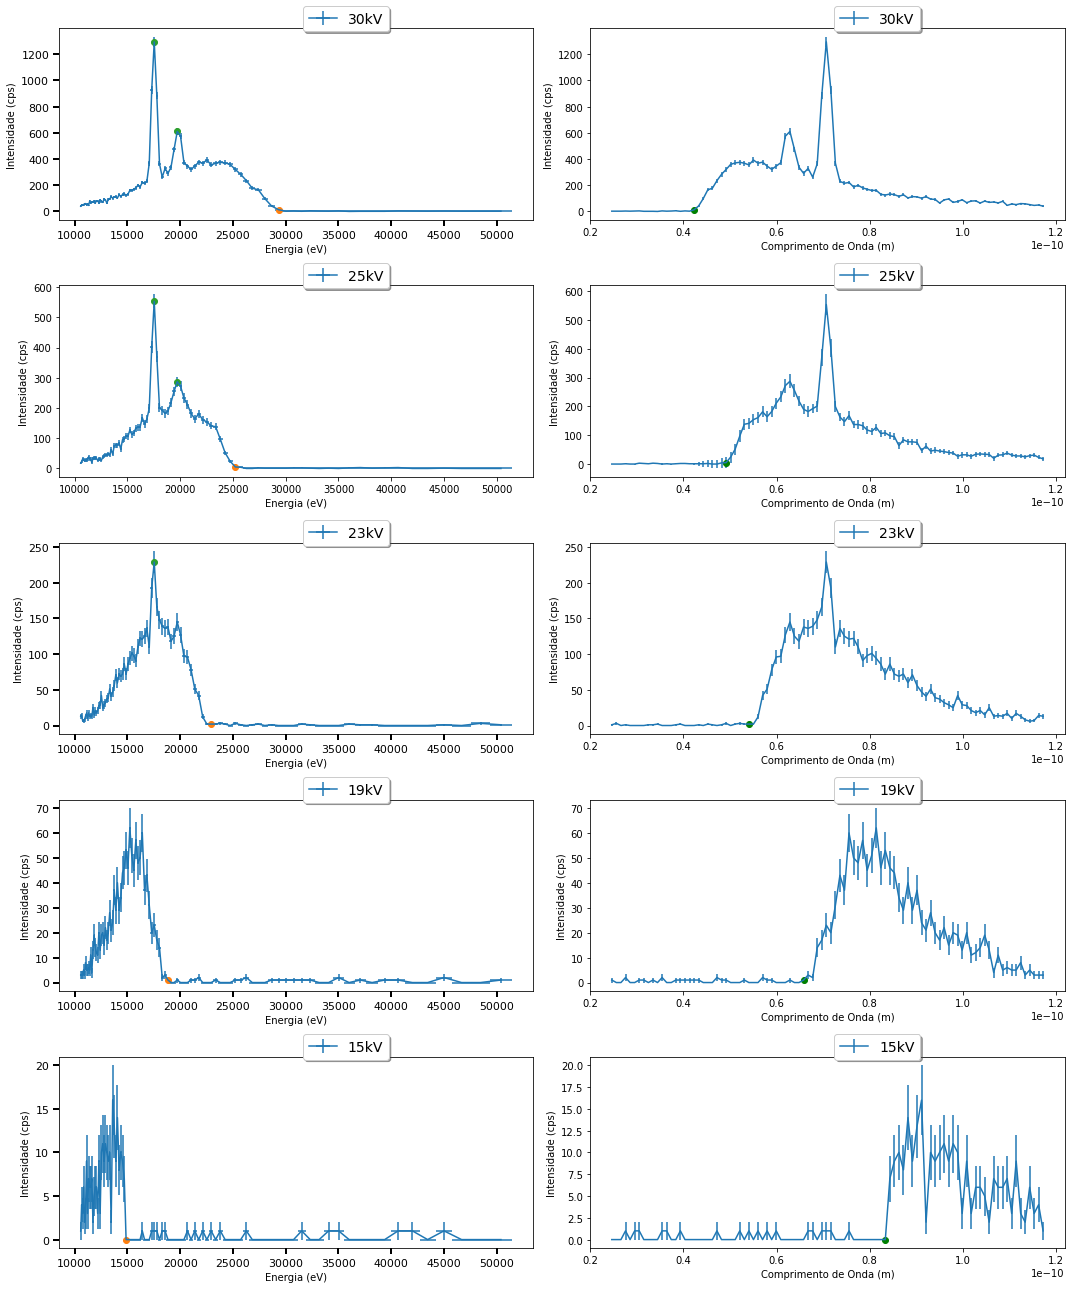

<Figure size 432x288 with 0 Axes>

In [89]:
fig, ax = plt.subplots(5,2,figsize=(15, 18))


ax[0,0].errorbar(data_2['theta_eV'],data_2['35kV'],yerr = np.sqrt(data_2['35kV']), xerr = data_2['sigma_theta_eV'], label = '30kV')
ax[0,0].set(xlabel='Energia (eV)', ylabel='Intensidade (cps)')
ax[0,0].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[0,0].plot(data_2['theta_eV'][mask_35kv],data_2['35kV'][mask_35kv],'o')
ax[0,0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 11)
ax[0,0].plot(data_2['theta_eV'][peak_35kv],data_2['35kV'][peak_35kv],'o')
ax[0,1].errorbar(data_2['theta_wavelength'],data_2['35kV'],yerr = np.sqrt(data_2['35kV']), label = '30kV')
ax[0,1].set(xlabel='Comprimento de Onda (m)', ylabel='Intensidade (cps)')
ax[0,1].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[0,1].plot(data_2['theta_wavelength'][mask_35kv],data_2['35kV'][mask_35kv],'o',color = 'green')


ax[1,0].errorbar(data_2['theta_eV'],data_2['30kV'],yerr = np.sqrt(data_2['30kV']), xerr = data_2['sigma_theta_eV'], label = '25kV')
ax[1,0].set(xlabel='Energia (eV)', ylabel='Intensidade (cps)')
ax[1,0].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[1,0].plot(data_2['theta_eV'][mask_30kv],data_2['30kV'][mask_30kv],'o')
ax[0,0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 11)
ax[1,0].plot(data_2['theta_eV'][peak_30kv],data_2['30kV'][peak_30kv],'o')
ax[1,1].errorbar(data_2['theta_wavelength'],data_2['30kV'],yerr = np.sqrt(data_2['35kV']), label = '25kV')
ax[1,1].set(xlabel='Comprimento de Onda (m)', ylabel='Intensidade (cps)')
ax[1,1].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[1,1].plot(data_2['theta_wavelength'][mask_30kv],data_2['30kV'][mask_30kv],'o',color = 'green')

ax[2,0].errorbar(data_2['theta_eV'],data_2['28kV'],yerr = np.sqrt(data_2['28kV']), xerr = data_2['sigma_theta_eV'], label = '23kV')
ax[2,0].set(xlabel='Energia (eV)', ylabel='Intensidade (cps)')
ax[2,0].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[2,0].plot(data_2['theta_eV'][mask_28kv],data_2['28kV'][mask_28kv],'o')
ax[2,0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 11)
ax[2,0].plot(data_2['theta_eV'][peak_28kv],data_2['28kV'][peak_28kv],'o')
ax[2,1].errorbar(data_2['theta_wavelength'],data_2['28kV'],yerr = np.sqrt(data_2['28kV']), label = '23kV')
ax[2,1].set(xlabel='Comprimento de Onda (m)', ylabel='Intensidade (cps)')
ax[2,1].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[2,1].plot(data_2['theta_wavelength'][mask_28kv],data_2['28kV'][mask_28kv],'o',color = 'green')

ax[3,0].errorbar(data_2['theta_eV'],data_2['25kV'],yerr = np.sqrt(data_2['25kV']), xerr = data_2['sigma_theta_eV'], label = '19kV')
ax[3,0].set(xlabel='Energia (eV)', ylabel='Intensidade (cps)')
ax[3,0].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[3,0].plot(data_2['theta_eV'][mask_25kv],data_2['25kV'][mask_25kv],'o')
ax[3,0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 11)
ax[3,1].set(xlabel='Comprimento de Onda (m)', ylabel='Intensidade (cps)')
ax[3,1].errorbar(data_2['theta_wavelength'],data_2['25kV'],yerr = np.sqrt(data_2['25kV']),label = '19kV')
ax[3,1].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[3,1].plot(data_2['theta_wavelength'][mask_25kv],data_2['25kV'][mask_25kv],'o',color = 'green')

ax[4,0].errorbar(data_2['theta_eV'],data_2['18kV'],yerr = np.sqrt(data_2['18kV']), xerr = data_2['sigma_theta_eV'], label = '15kV')
ax[4,0].set(xlabel='Energia (eV)', ylabel='Intensidade (cps)')
ax[4,0].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[4,0].plot(data_2['theta_eV'][mask_18kv],data_2['18kV'][mask_18kv],'o')
ax[4,0].tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 11)
ax[4,1].errorbar(data_2['theta_wavelength'],data_2['18kV'],yerr = np.sqrt(data_2['18kV']), label = '15kV')
ax[4,1].set(xlabel='Comprimento de Onda (m)', ylabel='Intensidade (cps)')
ax[4,1].legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True, fontsize =14)
ax[4,1].plot(data_2['theta_wavelength'][mask_18kv],data_2['18kV'][mask_18kv],'o',color = 'green')


# ax1.errorbar(data_2['theta_eV'],data_2['28kV'],yerr = np.sqrt(data_2['28kV']))
# ax1.errorbar(data_2['theta_eV'],data_2['25kV'],yerr = np.sqrt(data_2['25kV']))
# ax1.errorbar(data_2['theta_eV'],data_2['18kV'],yerr = np.sqrt(data_2['18kV']))

# ax1.legend(loc='center left', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True)
# parameters_text = AnchoredText(text_to_plot,loc = 'upper right')
# ax1.add_artist(parameters_text)



# ax[0].set_ylim(ymin=-50)

plt.tight_layout()

plt.savefig('plot_separado.png',dpi =600)
plt.show()
plt.clf()

In [100]:
data_2['sigma_theta_eV'][peak_28kv]

47    121.37221
Name: sigma_theta_eV, dtype: float64

In [54]:
mask_35kv = (data_2['35kV'].index == 18)
mask_30kv = (data_2['30kV'].index == 25)
mask_28kv = (data_2['28kV'].index == 30)
mask_25kv = (data_2['25kV'].index == 42)
mask_18kv = (data_2['18kV'].index == 60)


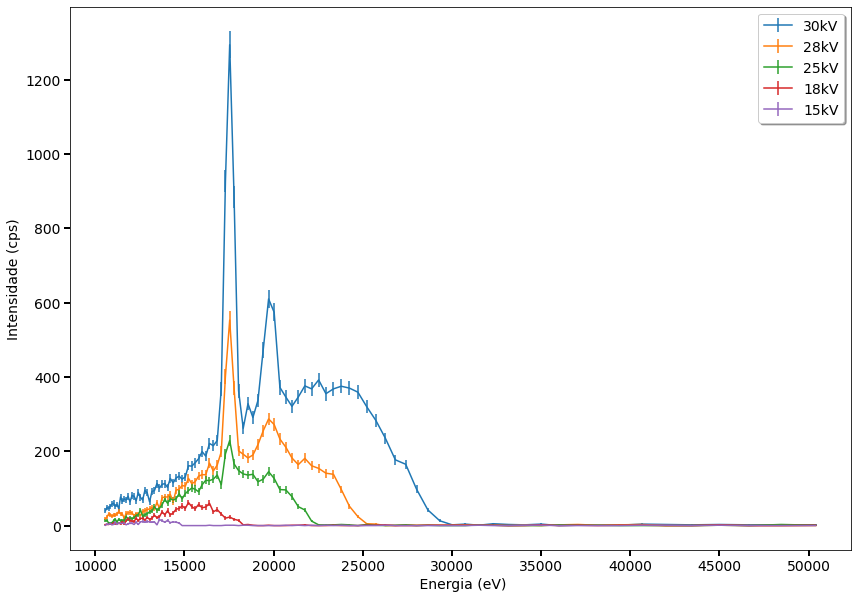

In [202]:
fig, ax = plt.subplots(figsize = (14,10))

ax.errorbar(data_2['theta_eV'],data_2['35kV'],yerr = np.sqrt(data_2['35kV']), label = '30kV')
# ax.plot(data_2['theta_eV'][mask_35kv],data_2['35kV'][mask_35kv],'o')
# ax.plot(data_2['theta_eV'][peak_35kv],data_2['35kV'][peak_35kv],'o')

ax.errorbar(data_2['theta_eV'],data_2['30kV'],yerr = np.sqrt(data_2['30kV']), label = '28kV')
# ax.plot(data_2['theta_eV'][mask_30kv],data_2['30kV'][mask_30kv],'o')
ax.errorbar(data_2['theta_eV'],data_2['28kV'],yerr = np.sqrt(data_2['28kV']), label = '25kV' )
# ax.plot(data_2['theta_eV'][mask_28kv],data_2['28kV'][mask_28kv],'o')
ax.errorbar(data_2['theta_eV'],data_2['25kV'],yerr = np.sqrt(data_2['25kV']), label = '18kV')
# ax.plot(data_2['theta_eV'][mask_25kv],data_2['25kV'][mask_25kv],'o')
ax.errorbar(data_2['theta_eV'],data_2['18kV'],yerr = np.sqrt(data_2['18kV']), label = '15kV')
# ax.plot(data_2['theta_eV'][mask_18kv],data_2['18kV'][mask_18kv],'o')

ax.legend(loc='upper right', ncol=1, fancybox=True, shadow=True, fontsize = 14)
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, labelsize = 14)

plt.ylabel('Intensidade (cps)', fontsize = 14)
plt.xlabel(' Energia (eV)', fontsize = 14)

plt.savefig('plot_completo_theta.png',dpi =300)

In [184]:
data_2['theta'][mask_18kv]

60    8.5
Name: theta, dtype: float64

In [157]:
u_acel = np.array([1.5e4,1.9e4,2.3e4,2.5e4,3e4])
lambda_min =1/ np.array([8.33645078771004e-11,6.580229572402391e-11,5.4057004421406324e-11,4.915583890967921e-11,4.13063431799842e-11])

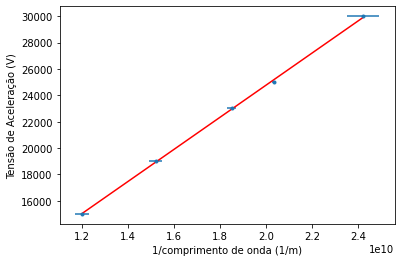

In [206]:
plt.errorbar(lambda_min,u_acel,xerr = [0.03e10,0.03e10,0.02e10,0.01e10,0.07e10], fmt = '.')
plt.plot(lambda_min, intercept + slope*lambda_min, 'r', label='fitted line')

plt.xlabel('1/comprimento de onda (1/m)')
plt.ylabel('Tensão de Aceleração (V)')

plt.savefig('fited.png', dpi = 300)

In [177]:
slope, intercept, r_value, p_value, std_err = stats.linregress(lambda_min,u_acel)

In [178]:
slope*e/c


6.511672400342613e-34

In [105]:
data_2['theta_wavelength'][peak_28kv]

47    7.068794e-11
Name: theta_wavelength, dtype: float64

In [190]:
std_err*e/c

7.762414297989812e-36